#### load in modules

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os

#### read in output from simulated sampling

In [1]:
# function to read in all detection_numbers_by_time csv files at different Ts for a given experiment
def read_inferred_rates(indir):
    dfs = []
    for f in os.listdir(indir):
        if f.startswith('T') and os.path.isdir(os.path.join(indir, f)):
            observation_time = int(f.split('T')[1])
            df = pd.read_csv(os.path.join(indir, f, 'detection_numbers_by_time.csv'))
            df['observe_time'] = observation_time
            dfs.append(df)

    # combine dfs
    combined_df = pd.concat(dfs)
    # replace NA values with 0
    combined_df = combined_df.fillna(0)

    return combined_df

In [3]:
# read in output from simulated sampling
no_recovery_output_df = read_inferred_rates('./results/no_recovery')
with_recovery_output_df = read_inferred_rates('./results/with_recovery')

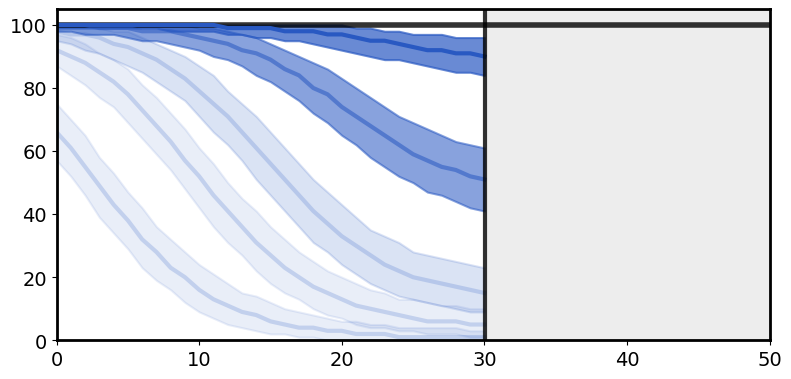

In [ ]:
fig, ax = plt.subplots(figsize=(9.2, 4.3))

# add vertical/horizontal lines
ax.axhline(y=100, color='black', linewidth=4, linestyle='-', alpha=0.8)

# plot detection numbers
observe_time = 30
sfs2plot = [0.01, 0.05, 0.15, 0.5, 0.9]

#################################
df = no_recovery_output_df[(no_recovery_output_df.observe_time == observe_time)]

# plot median and 95% CI
for sf in sfs2plot:
    ax.plot(df[df.sf == sf].time, df[df.sf == sf]['median'], label='A, sf=%.2f' % sf, linestyle='-',
            color='#2959c2',
            # color='#C1692D',
            linewidth=3, alpha=max(0.2, sf / (max(sfs2plot))))
    ax.fill_between(df[df.sf == sf].time, df[df.sf == sf].lw_95CI, df[df.sf == sf].up_95CI,
                    color='#2959c2',
                    # color='#EE8131',
                    alpha=min(0.7, max(0.1, sf / (max(sfs2plot)))), linewidth=1.5)

# add vertical line
ax.axvline(x=observe_time+0.05, color='black', linewidth=3, linestyle='-', alpha=0.8)

# shade in region after observe_time
ax.fill_betweenx([0, 105], observe_time, 50, color='darkgrey', alpha=0.2)

# set x limits
ax.set_xlim([0, 50])
ax.set_ylim([0, 105])

# adjust x-axis font size
plt.xticks(fontsize=14)
# adjust y-axis font size
plt.yticks(fontsize=14)

# add plot border
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

# export
fig.savefig('./figures/no_recovery_inferred_importation_rates.T30.pdf', bbox_inches='tight')

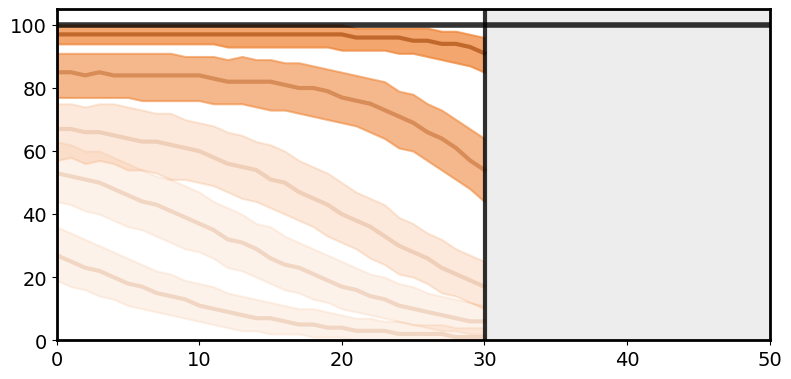

In [ ]:
fig, ax = plt.subplots(figsize=(9.2, 4.3))

# add vertical/horizontal lines
ax.axhline(y=100, color='black', linewidth=4, linestyle='-', alpha=0.8)

# plot detection numbers
observe_time = 30
sfs2plot = [0.01, 0.05, 0.15, 0.5, 0.9]

#################################
df = with_recovery_output_df[(with_recovery_output_df.observe_time == observe_time)]

# plot median and 95% CI
for sf in sfs2plot:
    ax.plot(df[df.sf == sf].time, df[df.sf == sf]['median'], label='A, sf=%.2f' % sf, linestyle='-',
            # color='#2959c2',
            color='#C1692D',
            linewidth=3, alpha=max(0.2, sf / (max(sfs2plot))))
    ax.fill_between(df[df.sf == sf].time, df[df.sf == sf].lw_95CI, df[df.sf == sf].up_95CI,
                    # color='#2959c2',
                    color='#EE8131',
                    alpha=min(0.7, max(0.1, sf / (max(sfs2plot)))), linewidth=1.5)

# add vertical line
ax.axvline(x=observe_time+0.05, color='black', linewidth=3, linestyle='-', alpha=0.8)

# shade in region after observe_time
ax.fill_betweenx([0, 105], observe_time, 50, color='darkgrey', alpha=0.2)

# set x limits
ax.set_xlim([0, 50])
ax.set_ylim([0, 105])

# adjust x-axis font size
plt.xticks(fontsize=14)
# adjust y-axis font size
plt.yticks(fontsize=14)

# add plot border
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

# export
fig.savefig('./figures/with_recovery_inferred_importation_rates.T30.pdf', bbox_inches='tight')